In [14]:
import os
import numpy as np
!pip install unicodecsv

In [15]:
import unicodecsv

# convert cvs file to list
def readFile(fileName):
  with open (fileName,'rb') as f :
    reader = unicodecsv.DictReader(f)
    product = list(reader)
  
  return product

In [97]:
Contract_Data = readFile("./Data/Contract_Data.csv")


Contract_Data[2]

OrderedDict([('Number', '1003'),
             ('Type', 'secondment'),
             ('2nd party', 'BB'),
             ('emplyeeID', '3'),
             ('sector', 'operation'),
             ('Date', '12/04/2020')])

In [17]:
Employee_Data = readFile("./Data/Employee_Data.csv")


Employee_Data[0]

OrderedDict([('ID', '1'),
             ('name', ''),
             ('Gender', 'Male'),
             ('Nationality', 'Saudi'),
             ('Jop', 'programmer'),
             ('company', 'SAS')])

In [30]:
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point.get("emplyeeID")
        for data_point in Employee_Data :
            key2 = data_point.get("ID")
            if key == key2 : 
                value = data_point.get(key_name)
                if value != "Saudi" :
                    value = "Non Saudi"
                grouped_data[value].append(data_point)
    return grouped_data

In [31]:
from collections import defaultdict
from collections import Counter 

number_saudies = group_data(Contract_Data,
                                   'Nationality')

In [48]:
emp_S = number_saudies["Saudi"]
emp_N = number_saudies["Non Saudi"]
print( " percentage of saudi : "+ str(int((len(emp_S) / (len(emp_S)+len(emp_N))  )*100)) + "%")


 percentage of saudi : 60%


In [56]:
def group_data2(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point.get(key_name)
        grouped_data[key].append(data_point)
    return grouped_data

In [57]:
number_saudies = group_data2(Contract_Data,
                                   'Type')
emp_S = number_saudies["sharing"]
emp_N = number_saudies["secondment"]
print( " Number of Sharing contract : "+ str(int(len(emp_S))))
print( " Number of Secondment contract : "+ str(int(len(emp_N))))
print( " the overall profit from shring emplyee : "+ str(int((len(emp_S)+len(emp_N))* 300)))





 Number of Sharing contract : 3
 Number of Secondment contract : 2
 the overall profit from shring emplyee : 1500


In [214]:
number_saudies = group_data2(Contract_Data,
                                   'sector')
print ("the Sectors that got advantage in shaing employee : ")
#print the keys:
maxV = 0
maxS = ""
summed_Sector = defaultdict(list)
for key,value  in number_saudies.items() :
    print (key)
    summed_Sector[key].append(len(value))
    if len(value) > maxV :
        maxV = len(value)
        maxS = key
        
    

print ("most requested sectors : " + maxS )


the Sectors that got advantage in shaing employee : 
marketing
operation
logistic
most requested sectors : operation


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


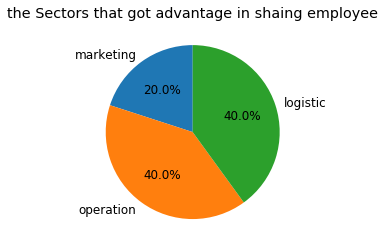

In [215]:
province_population = [summed_Sector["marketing"], summed_Sector["operation"], summed_Sector["logistic"]]
activities = ['marketing', 'operation', 'logistic']
plt.pie(province_population, labels=activities, startangle=90, autopct='%.1f%%')
plt.title('the Sectors that got advantage in shaing employee')
#plt.show()

In [183]:
def group_data3(data, key_name):

    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point.get("emplyeeID")
        for data_point in Employee_Data :
            key2 = data_point.get("ID")
            if key == key2 : 
                value = data_point.get(key_name)
                gg = data_point.get("Gender")
                if gg == "Female" :
                    grouped_data[value].append("F")
                if gg == "Male" :
                    grouped_data[value].append("M")
                
    return grouped_data

In [184]:
number_saudies = group_data3(Contract_Data,
                                   'Jop')

print ("the most requested skill in employee : ")
#print the keys:
maxV = 0
maxS = ""
female = []
male = []

for key,value  in number_saudies.items() :
    print (key)
    C = Counter(value)
    female.append(C["F"])
    male.append(C["M"])
    print ("female :" + str(C["F"]))
    print ("male :" + str(C["M"]))
    
    if len(value) > maxV :
        maxV = len(value)
        maxS = key
        
    

print ("most requestedskill : " + maxS )


 

the most requested skill in employee : 
programmer
female :0
male :1
photographer
female :0
male :1
Customer services
female :0
male :1
order deliver
female :2
male :0
most requestedskill : order deliver


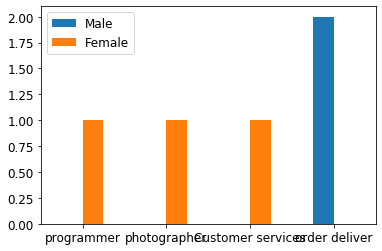

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

index = number_saudies.keys()
df33 = pd.DataFrame({'Male': female ,'Female': male}, index=index)
ax = df33.plot.bar(rot=0)

In [98]:
# Explore data

# examine if registration increase or decrease
# get summition of prudct in each year 
Begining_April = 0
half_April = 0
end_April = 0

for contract in Contract_Data : 
    # take the first 4 number from ProductNumber which represent year of rigetrition 
    day = contract.get('Date')[:2]
  
    if day < '15':
        Begining_April += 1
        continue
    if day < '20' :
        half_April += 1
        continue
    if day < '30' :
        end_April += 1




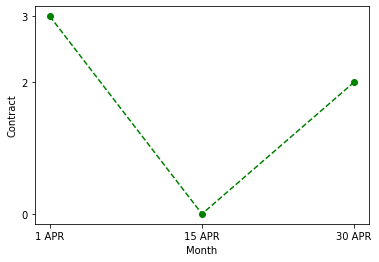

In [101]:
#import matplotlib libary
import matplotlib.pyplot as plt
#define some data
x = ["1 APR","15 APR","30 APR"]
y = [Begining_April, half_April, end_April]

#plot data
plt.plot(x, y, linestyle="dashed", marker="o", color="green")

#configure  X axes
plt.xticks(["1 APR","15 APR","30 APR"])

#configure  Y axes
plt.yticks(y)

#labels
plt.xlabel("Month")
plt.ylabel("Contract")



#show plot
#plt.show()

In [ ]:
plt.savefig('books_read.png')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


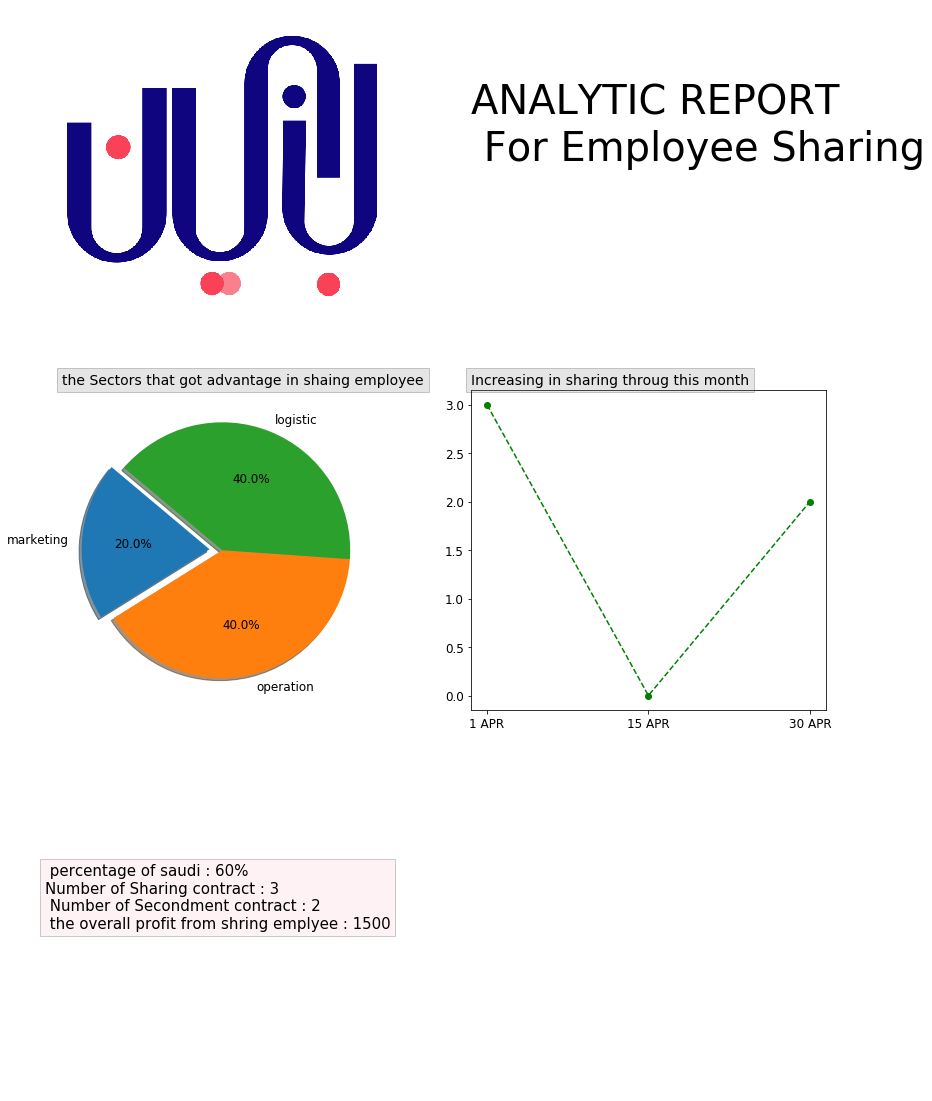

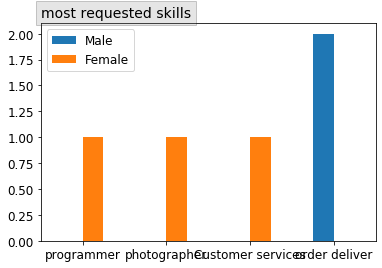

In [234]:
box = dict(facecolor='pink', pad=5, alpha=0.2)
title_box = dict(facecolor='gray', pad=5, alpha=0.2)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(20)

# logo
ax1 = plt.subplot2grid((3,2), (0,0))
logo = plt.imread('Logo_plain.png')
img = ax1.imshow(logo)
ax1.axis('off')


#fig.suptitle('This is a somewhat long figure title', fontsize=16 , bbox=box )


#title
title = 'ANALYTIC REPORT\n For Employee Sharing'
ax2 = plt.subplot2grid((3,2), (0,1))
ax2.set_title(title,loc='left' , size=40, y=0.5)
ax2.axis('off')


#pie
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
explode = (0.1, 0, 0)  
province_population = [summed_Sector["marketing"], summed_Sector["operation"], summed_Sector["logistic"]]
activities = ['marketing', 'operation', 'logistic']
ax3 = plt.subplot2grid((3,2), (1,0))
ax3.set_title("the Sectors that got advantage in shaing employee", loc='left',bbox=title_box, size=14)
ax3.pie(province_population, explode=explode, labels=activities,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140 )



#chart1
ax4 = plt.subplot2grid((3,2), (1,1))
x = ["1 APR","15 APR","30 APR"]
y = [Begining_April, half_April, end_April]
#plot data
ax4.plot(x, y, linestyle="dashed", marker="o", color="green")
ax4.set_title("Increasing in sharing throug this month", loc='left',bbox=title_box, size=14 )


Desc = " percentage of saudi : "+ str(int((len(emp_S) / (len(emp_S)+len(emp_N))  )*100)) + "%" +"\n" +"Number of Sharing contract : "+ str(int(len(emp_S))) + "\n"+" Number of Secondment contract : "+ str(int(len(emp_N)))+ "\n"+" the overall profit from shring emplyee : "+ str(int((len(emp_S)+len(emp_N))* 300))
ax5 = plt.subplot2grid((3,2), (2,0))
ax5.set_title(Desc,loc='left' , size=15 , bbox=box , y=0.5)
ax5.axis('off')

ax5 = df33.plot.bar(rot=0)
ax5.set_title("most requested skills", loc='left',bbox=title_box, size=14 )

plt.show()

In [235]:
plt.savefig('books_read.png')

<Figure size 432x288 with 0 Axes>